# 1. Supervised Learning

Supervised machine learning algorithms are designed to learn by example. The name “supervised” learning originates from the idea that training this type of algorithm is like having a teacher supervise the whole process.

When training a supervised learning algorithm, the training data will consist of inputs paired with the correct outputs. 

During training, the algorithm will search for patterns in the data that correlate with the desired outputs.

At its most basic form, a supervised learning algorithm can be written simply as:

\begin{equation*}
Y = f(x)
\end{equation*}

Where Y is the predicted output that is determined by a mapping function that assigns a class to an input value x. The function used to connect input features to a predicted output is created by the machine learning model during training.

## 1.1 Classification

Supervised learning can be split into two subcategories: **Classification** and **regression**.

During training, a classification algorithm will be given data points with an assigned category. The job of a classification algorithm is to then take an input value and assign it a class, or category, that it fits into based on the training data provided. Think spam or not spam.

<img src="img/lab_03_clf.png"/>

Classification problems can be solved with a numerous amount of algorithms. Whichever algorithm you choose to use depends on the data and the situation. Here are a few popular classification algorithms:

* Linear Classifiers
* Support Vector Machines
* Decision Trees classifiers
* K-Nearest Neighbor
* Random Forest

## 1.2 Regression

Regression is a predictive statistical process where the model attempts to find the important relationship between dependent and independent variables. The goal of a regression algorithm is to predict a continuous number such as sales, income, and test scores. The equation for basic linear regression can be written as so:

\begin{align}
\hat{y} & = wx + b \\
\end{align}


\begin{align}
\hat{y} & = w[0] * x[0] + w[1] * x[1] + ... + w[i] * x[i] + b \\
\end{align}


Where x[i] is the feature(s) for the data and where w[i] and b are parameters which are developed during training.

Scikitlearn designates the vector w=(w<sub>1</sub>, ..., w<sub>p</sub>) as `coef_` and w<sub>0</sub> as `intercept_`

There are many different types of regression algorithms. The three most common are listed below:
* Linear Regression
* Polynomial Regression
* Decision Trees Regressions


### 1.2.1 Linear Regression

Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning.

There are more advanced ways to fit a line to data, but in general, we want the line to go through the "middle" of the points.


## Which line fits the data graphed below?

<img src="img/lab_03_linear_fit.png"/>


### How to describe a given model with a linear equation?

Step 1: Find the slope.

Step 2: Find the y-intercept.

Step 3: Write the equation in y=Wx+b form


<img src="img/lab_03_reg.png"/>

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

# How to find the best fitting line?

### Ordinary Least Squares

Linear Regression its a linear model with coefficients ` w = (w1, ...,wp) ` to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

\begin{equation*}
\min_{w} || X w - y||_2^2
\end{equation*}

### 1.2.2 Making predictions

Given the representation is a linear equation, making predictions is as simple as solving the equation for a specific set of inputs.

Let’s make this concrete with an example. 

In [ ]:
# Sklearn installation guide https://scikit-learn.org/stable/install.html
!pip install scikit-learn

In [ ]:
# Regression Example
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=13, random_state=0)
X.shape
X[0]
plt.scatter(X,y)
plt.show()

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)   # talk about sklearn estimators - any object that learns from data

In [ ]:
reg.fit(X, y)

In [ ]:
xfit = np.linspace(start=-2, stop =3)
yfit = reg.predict(xfit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(xfit, yfit, color='red')

In [ ]:
reg.coef_

In [ ]:
print("Slope:    ", reg.coef_[0])
print("Intercept:", reg.intercept_)

We can now predict y values for new data points that we haven't seen yet. 


\begin{align}
\hat{y} & = wx + b \\
\end{align}

Where **w** is the `slope` and **b** is the `intecept`.

Let's create a function to predict y values for a given x.

In [ ]:
def custom_predict(x):
    w = reg.coef_[0]
    b = reg.intercept_
    y = w*x + b
    return y

print("Predicted y For 3:     ", custom_predict(3))
print("Predicted y For 20: ", custom_predict(0.97873798))

How good is our model?

In [ ]:
# from our training data
X[0], y[0]

In [ ]:
print("Predicted y For {}: ".format(X[0][0]), custom_predict(X[0][0]))

### 1.2.3 Scikit learn estimators

sklearn has one predominant object: the estimator. An estimator is an object that fits a model based on some training data and is capable of inferring some properties on new data. It can be, for instance, a classifier or a regressor. 

```
reg = LinearRegression(fit_intercept=True)
```

The next thing you will probably want to do is to estimate some parameters in the model. This is implemented in the fit() method.

The `fit()` method takes the training data as arguments, which can be one array in the case of unsupervised learning, or two arrays in the case of supervised learning. All estimators implement the fit method:




```python
estimator.fit(X, y)
```

All supervised estimators in scikit-learn implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations X, returns the predicted labels y.

In [ ]:
X[20][

In [ ]:
X[20].reshape(-1, 1).shape, X[20].shape

In [ ]:
# print(reg.predict(X[20]))
y_pred = reg.predict(np.array(X[20]).reshape(-1, 1))
y_pred,y[20]

In [ ]:
assert y_pred == y[20]

### 1.2.4 How good are my predictions?

Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve.


For `Linear Regression`, the default metric is **The coefficient of determination (R²)**. It measures how well a statistical model predicts an outcome.


![R<sup>2</sup>](https://blog.minitab.com/hubfs/Imported_Blog_Media/fittedxobserved.gif)


Scikit-learn offers many metrics of the shelf ([link](https://scikit-learn.org/stable/modules/model_evaluation.html)).

In [ ]:
y_pred = reg.predict(X)

In [ ]:
reg.score(X, y)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, y_pred)

## 1.3 Linear Regression Assumption

Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.

* **Linear Assumption**: Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
* **Remove Noise**: Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
* **Remove Collinearity**: Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
* **Rescale Inputs**: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

See the Wikipedia article on [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression#Assumptions) for an excellent list of the assumptions made by the model. There’s also a great list of assumptions on the [Ordinary Least Squares Wikipedia article](https://en.wikipedia.org/wiki/Ordinary_least_squares#Assumptions).

----

# 2- End-to-End Regression Example


Diabetes dataset has ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements for 442 diabetes patients.

The target variable is a quantitative measure of disease progression one year after baseline.

The goal is to train a model that can predict the disease progression from the provided features.

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
# loading the data
diabetes = datasets.load_diabetes()

# create feature and target datasets
X, y = diabetes.data, diabetes.target
print(diabetes.feature_names)

In [ ]:
X.shape, y.shape

In [ ]:
# exploring the dataset
df_x = pd.DataFrame(data=X, columns=diabetes.feature_names)

g = sns.pairplot(df_x, height=2.5)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

In [ ]:
# find if any datapoint is missing
df_x.isnull().sum()


## 2.1 Using only one features 


In [ ]:
# Split the targets into training/testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X[:, 0].reshape(-1,1), y, 
                                                    test_size = 0.2,
                                                    random_state=42)

X[:, 0].shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(X_train, y_train)

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
from sklearn.metrics import r2_score


# The coefficients
print('Coefficients: \n', regr.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

In [ ]:
y_pred.shape, X_test[:,0]

In [ ]:
# Plot outputs
plt.title("Predicted vs real values")
plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_test, y_pred,  color='red', alpha=0.3)

plt.xticks(())
plt.yticks(())

plt.show()

## 2.2 Using all features 

Classwork: now let's try using all the features.

Set the `n_jobs` parameter to -1.

In [ ]:
# write your code here

## 2.3 Cross Validation

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function.


When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.

This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called `validation set`: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.


<img src="img/lab_03_cv.png"/>

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called `cross-validation` (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

* A model is trained using `k−1` of the folds as training data;
* the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems where the number of samples is very small.

<img src="img/lab_03_cv_2.png"/>

In [ ]:
from sklearn.model_selection import cross_val_score

linreg = linear_model.LinearRegression()

print(cross_val_score(linreg, X_train, y_train, cv=5, scoring='r2'))

## 2.4 Overfitting and Underfitting

The reason we have train-test split is so that we can determine and adjust the performance of our models. Otherwise we would be blindly training our models to predict without any insight on the model’s performance.

<img src="img/lab_03_fit.png"/>

### 2.4.1 Underfitting

```Your model is underfitting the training data when the model performs poorly on the training data.```

* Trying to create a linear model with non linear data.
* Having too little data to build an accurate model
* Model is too simple, has too few features

Underfit learners tend to have low variance but high bias. The model simply does not campture the relationship of the training data, leading to inaccurate predictions of the training data.


**Remedies**
* Add more features during Feature Selection.
* Engineer additional features within the scope of your problem that makes sense.
* Having more features limits bias within your model.

### 2.4.2 Overfitting

```“Your model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data.”```

The primary cause of models being overfit is that the algorithm captured the “noise” of the data. Overfitting occurs when the model fits the data too well. An overfit model shows low bias and high variance. The model is excessively complicated likely due to redundant features.

**Remedies**

When a model is overfit, the relationship between model features and the target variable is not being captured.

* One remedy for this is k-fold cross validation. It is a powerful preventative measure against overfitting. The idea behind cross validation is that you are performing multiple mini train-test splits to tune your model.
* A second remedy is that you can train with more data. This won’t work in every case, but in scenarios where you are looking at a skewed sample of data, sampling additional data can help normalize your data. 
* A third remedy is that you can remove features. But it is important to have an understanding of feature importance. You have to be mindful of the problem you are trying to address and have some domain knowledge. Ultimately redundant features will not help and should not be included in your machine learning model


**Additional Remedies**

`Regularization` is a method that entails a variety of techniques to artificially force your model to be simpler. The technique being used depends on the type of learner you are using. For example, for a linear regression you can add a penalty parameter to the cost function. “But oftentimes, the regularization method is a hyperparameter as well, which means it can be tuned through cross-validation.”


`Ensembles` are a machine learning method to combine predictions from multiple separate models. Ensembles use bagging to attempt to reduce the chance to overfit complex models, and boosting to improve “predictive flexibility of simple models.”

To sum up, Your model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y). 

Your model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

## 2.5 Bias-Variance Tradeoff

<img src="img/lab_03_bias.jpg"/>

The **bias-variance tradeoff** is a key concept in machine learning that explains the balance between how well a model fits the training data and how well it can generalize to new, unseen data.


**What is Bias?**

`Bias` is the simplifying assumptions made by a model to make the target function easier to learn.

* Low Bias: Predicting less assumption about Target Function (simple model)
* High Bias: Predicting more assumption about Target Function (captruing too much detail)

`Error due to Bias:` The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Of course you only have one model so talking about expected or average prediction values might seem a little strange. However, imagine you could repeat the whole model building process more than once: each time you gather new data and run a new analysis creating a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. Bias measures how far off in general these models' predictions are from the correct value.




**What is Variance?**

`Variance` refers to how much the model's predictions change when it's trained on different sets of data. A model with high variance is too sensitive to the specific training data and captures even small, random fluctuations (noise) in it. This is called overfitting because the model works really well on the training data but fails to generalize to new data.

`Error due to Variance:` The error due to variance is taken as the variability of a model prediction for a given data point. Again, imagine you can repeat the entire model building process multiple times. The variance is how much the predictions for a given point vary between different realizations of the model.

<img src="img/lab_03_bias_var.png"/>
Source: http://scott.fortmann-roe.com/docs/BiasVariance.html

### The Tradeoff
The goal in machine learning is to find a balance between bias and variance to minimize the overall error:

* If a model has high bias (too simple), it may underfit, performing poorly on both training and test data.
* If a model has high variance (too complex), it may overfit, performing well on training data but poorly on test data.


At its root, dealing with bias and variance is really about dealing with over- and under-fitting. Bias is reduced and variance is increased in relation to model complexity. As more and more parameters are added to a model, the complexity of the model rises and variance becomes our primary concern while bias steadily falls. For example, as more polynomial terms are added to a linear regression, the greater the resulting model's complexity will be.

Understanding bias and variance is critical for understanding the behavior of prediction models, but in general what you really care about is overall error, not the specific decomposition. The sweet spot for any model is the level of complexity at which the increase in bias is equivalent to the reduction in variance.




## 2.6 Regularization


This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

 These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

Two popular examples of regularization procedures for linear regression are:

* Ridge Regression: where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
* Lasso Regression: where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).

These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

### 2.6.1 Ridge Regression


Ridge regression tries to make predictions while keeping the model's coefficients (the numbers that multiply each input feature) small. It adds a penalty to the model for having large coefficients. The idea is: the simpler the model, the less likely it will overfit the data. Ridge regression spreads out the influence across all features instead of letting a few dominate. It's good when all features have some influence on the outcome.

* Penalty: Ridge regression adds a penalty based on the sum of the squares of the coefficients.
* Result: It keeps all features in the model but reduces their impact by shrinking the coefficients.
----
[optional] more technical explaination 

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:


\begin{equation*}
\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2
\end{equation*}


The complexity parameter α ≥ 0 controls the amount of shrinkage: the larger the value of α, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.


### 2.6.2 Lasso Regression

Lasso regression also adds a penalty, but in a slightly different way. It tends to push the coefficients of less important features all the way to zero. This means that Lasso can completely remove some features from the model, making it useful for feature selection (deciding which features are most important).

* Penalty: Lasso adds a penalty based on the sum of the absolute values of the coefficients.
* Result: It can force some coefficients to zero, effectively removing them from the model.


----
[optional] more technical explaination 

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients.

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:


\begin{equation*}
\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}
\end{equation*}




## Summary:

* Ridge: Shrinks the coefficients but keeps all features.
* Lasso: Shrinks some coefficients to zero, effectively selecting a subset of important features.

Both methods help prevent overfitting, but Lasso is often used when you suspect that only a few features are truly important, while Ridge is better when most features are expected to contribute to the prediction.

# Download Air Quality data

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. 

Ground Truth exists for hourly averaged concentrations for CO,  Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)

in this example, we will build a linear model to predict CO concentration on hour ahead.


[source](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

In [ ]:
!mkdir ./data
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip --output ./data/AirQualityUCI.zip
!unzip ./data/AirQualityUCI.zip -d ./data/ && rm ./data/AirQualityUCI.zip

In [191]:
import pandas as pd

In [192]:
df_air = pd.read_csv('./data/AirQualityUCI.csv', sep=';', decimal='.')
print(df_air.shape)
df_air.head()

(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [193]:
df_air.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

**Question: Are all data types what you expected them to be?**

In [194]:
df_air['DateTime'] = df_air['Date'] + ' ' + df_air['Time']

In [195]:
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,DateTime
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN,10/03/2004 18.00.00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN,10/03/2004 19.00.00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN,10/03/2004 20.00.00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN,10/03/2004 21.00.00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN,10/03/2004 22.00.00


In [196]:
# convert string to datetime
df_air['DateTime'] = pd.to_datetime(df_air["DateTime"],
                                    format = "%d/%m/%Y %H.%M.%S")

In [197]:
# i won't need Data and Time columns seperately 
df_air.drop(columns=['Date', 'Time'])

df_air = df_air.drop(columns=['Date', 'Time'])

In [198]:
df_air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,DateTime
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN,2004-03-10 18:00:00
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN,2004-03-10 19:00:00
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN,2004-03-10 20:00:00
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN,2004-03-10 21:00:00
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN,2004-03-10 22:00:00


In [199]:
# set the  index
df_air.set_index("DateTime", inplace= True)

In [200]:
df_air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


**What else do I need to do to preparet the data?**

1. check all the columns and make sure they are relevant/useful
2. look for missing values (pro tip: missingno library is your friend!)
3. decide on missing values


In [201]:
# drop unnamed columns 
df_air = df_air.drop('Unnamed: 15', axis=1)
df_air.drop('Unnamed: 16', axis=1, inplace=True)

In [202]:
# Pro tip [optional]

target_cols = [col for col in df_air.columns if 'Unnamed' in col]
# or
df_air.filter(like='Unanmed').columns

Index([], dtype='object')

In [203]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   object 
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   object 
 11  RH             9357 non-null   object 
 12  AH             9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 1.0+ MB


Why do I still have `object`s? 

In [204]:
# cast objects as float for one column
pd.to_numeric(df_air['CO(GT)'], errors='raise')

ValueError: Unable to parse string "2,6" at position 0

In [205]:
# don't forget to use `in_place` or re-assign the variable
df_air['CO(GT)'] = df_air['CO(GT)'].str.replace(',', '.')

In [206]:
pd.to_numeric(df_air['CO(GT)'], errors='raise')

DateTime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN
NaT                    NaN
Name: CO(GT), Length: 9471, dtype: float64

In [207]:
df_air['CO(GT)'] = pd.to_numeric(df_air['CO(GT)'], errors='raise')

In [208]:
# never do the same thing twice!
str_cols = df_air.select_dtypes('object').columns.to_list()

df_air[str_cols].apply(lambda x: x.str.replace(',', '.'))

,C6H6(GT),T,RH,AH
DateTime,,,,
2004-03-10 18:00:00,11.9,13.6,48.9,0.7578
2004-03-10 19:00:00,9.4,13.3,47.7,0.7255
2004-03-10 20:00:00,9.0,11.9,54.0,0.7502
2004-03-10 21:00:00,9.2,11.0,60.0,0.7867
2004-03-10 22:00:00,6.5,11.2,59.6,0.7888
...,...,...,...,...
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


In [209]:
df_air[str_cols] = df_air[str_cols].apply(lambda x: x.str.replace(',', '.'))

In [210]:
df_air[str_cols].apply(lambda x: pd.to_numeric(x, errors='raise'))

,C6H6(GT),T,RH,AH
DateTime,,,,
2004-03-10 18:00:00,11.9,13.6,48.9,0.7578
2004-03-10 19:00:00,9.4,13.3,47.7,0.7255
2004-03-10 20:00:00,9.0,11.9,54.0,0.7502
2004-03-10 21:00:00,9.2,11.0,60.0,0.7867
2004-03-10 22:00:00,6.5,11.2,59.6,0.7888
...,...,...,...,...
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


In [211]:
# great no errors, so let's apply it
df_air[str_cols] = df_air[str_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

What about missing values then?

In [212]:
df_air.isna().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [213]:
df_air.dropna(how='any').shape, df_air.shape

((9357, 13), (9471, 13))

Let's drop them for now.


[optional]: replace them with their corresponding `mean`

In [214]:
df_air = df_air.dropna(how='all')

#### Remember what was our goal?
To build a linear model to predict CO concentration on hour ahead.

We need to construct a new column called "target" which is the CO concentration lagged forward by one time step

In [215]:
df_air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [216]:
df_air["TARGET"]= df_air["CO(GT)"].shift(1)

In [217]:
df_air = df_air[df_air['TARGET'].notna()]

In [218]:
df_air.shape

(9356, 14)

Now let's check the correlation between the independent variables (feautures) and the target.

In [219]:
df_air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,TARGET
DateTime,,,,,,,,,,,,,,
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2.6
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2.0
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2.2
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2.2
2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,1.6


In [220]:
df_air.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,TARGET
CO(GT),1.000000,0.041366,0.128274,-0.031391,0.029904,0.526458,-0.090026,0.671120,-0.073759,0.080280,-0.068944,-0.048237,-0.045903,0.865878
PT08.S1(CO),0.041366,1.000000,0.169837,0.852706,0.933111,0.278007,0.086945,0.153995,0.845143,0.892432,0.754871,0.745394,0.764921,0.037374
NMHC(GT),0.128274,0.169837,1.000000,0.037275,0.110029,-0.004426,0.048644,0.103233,0.162574,0.101062,-0.000030,0.008243,0.012457,0.123690
C6H6(GT),-0.031391,0.852706,0.037275,1.000000,0.767432,-0.001174,0.512191,-0.011004,0.774676,0.641334,0.971376,0.925062,0.984555,-0.031283
PT08.S2(NMHC),0.029904,0.933111,0.110029,0.767432,1.000000,0.331276,-0.073709,0.176471,0.874780,0.909904,0.669028,0.585801,0.646571,0.024740
NOx(GT),0.526458,0.278007,-0.004426,-0.001174,0.331276,1.000000,-0.436099,0.817148,0.035547,0.461900,-0.138452,-0.053009,-0.095847,0.508300
PT08.S3(NOx),-0.090026,0.086945,0.048644,0.512191,-0.073709,-0.436099,1.000000,-0.256281,0.122685,-0.208932,0.588124,0.573554,0.621625,-0.084541
NO2(GT),0.671120,0.153995,0.103233,-0.011004,0.176471,0.817148,-0.256281,1.000000,-0.022204,0.253418,-0.084109,-0.081314,-0.060449,0.651210
PT08.S4(NO2),-0.073759,0.845143,0.162574,0.774676,0.874780,0.035547,0.122685,-0.022204,1.000000,0.723678,0.755071,0.640709,0.691916,-0.076524
PT08.S5(O3),0.080280,0.892432,0.101062,0.641334,0.909904,0.461900,-0.208932,0.253418,0.723678,1.000000,0.503705,0.524955,0.519466,0.075966


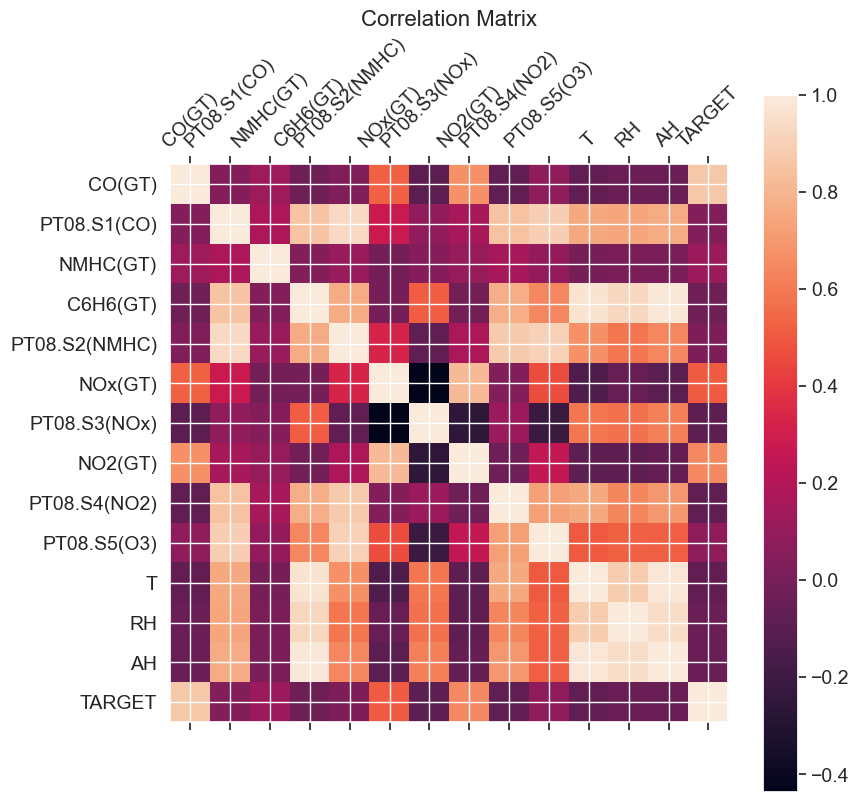

In [221]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(9, 9))
plt.matshow(df_air.corr(), fignum=f.number)
plt.xticks(range(df_air.select_dtypes(['number']).shape[1]), 
           df_air.select_dtypes(['number']).columns,
           fontsize=14, 
           rotation=45)
plt.yticks(range(df_air.select_dtypes(['number']).shape[1]), 
           df_air.select_dtypes(['number']).columns,
           fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Target and CO(GT) are highly correlated - so we have to drop that.

optional at home practice: drop features that are correlated with |0.7| and run the ordinary lin regression and compare the result.

In [222]:
df_air = df_air.drop(columns='CO(GT)')

Also note that there are many highly correalted features with each other!

Not only a group of highly correlated features will not bring additional information, but also  depending on the features and the model, correlated features might not always harm the performance of the model but that is a real risk.


For linear models (e.g., linear regression or logistic regression), **multicolinearity** can yield solutions that are wildly varying and possibly numerically unstable.


**Multicollinearity** is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0.


Lasso deals with Multicollinearity.

In [223]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_air[df_air.columns.difference(['TARGET'])], 
                                                    df_air[['TARGET']],
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6549, 12), (2807, 12), (6549, 1), (2807, 1))

In [224]:
X_train

,AH,C6H6(GT),NMHC(GT),NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T
DateTime,,,,,,,,,,,,
2005-02-09 18:00:00,-200.0000,-200.0,-200.0,209.0,355.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0
2004-10-18 05:00:00,1.0703,3.1,-200.0,-200.0,-200.0,825.0,661.0,1074.0,1207.0,710.0,67.4,14.0
2004-07-21 08:00:00,1.3774,27.7,-200.0,140.0,286.0,1526.0,1495.0,471.0,2405.0,1904.0,42.2,25.8
2004-10-03 01:00:00,1.5240,6.5,-200.0,-200.0,-200.0,1037.0,836.0,788.0,1467.0,904.0,63.2,20.7
2004-05-22 22:00:00,1.2082,12.7,-200.0,85.0,101.0,1321.0,1075.0,757.0,1891.0,1017.0,50.5,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2004-11-04 17:00:00,1.6683,45.9,-200.0,186.0,1052.0,1915.0,1889.0,340.0,2603.0,2110.0,53.9,24.8
2004-10-13 02:00:00,0.9428,0.9,-200.0,-200.0,-200.0,723.0,485.0,1419.0,1065.0,425.0,57.1,14.6
2004-10-21 09:00:00,1.6636,20.6,-200.0,119.0,524.0,1392.0,1313.0,517.0,1866.0,1478.0,61.5,22.6


In [225]:
reg_l1 = Lasso(tol=1e-2,
               random_state=42)
reg_l1.fit(X_train, y_train)

/usr/local/google/home/amirimani/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.912e+05, tolerance: 3.988e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(random_state=42, tol=0.01)

In [226]:
print(reg_l1.score(X_test, y_test))

0.45922311213852673


In [227]:
import numpy as np

corr_matrix = df_air.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [228]:
# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


df_air_filter = df_air.drop(to_drop, axis=1)

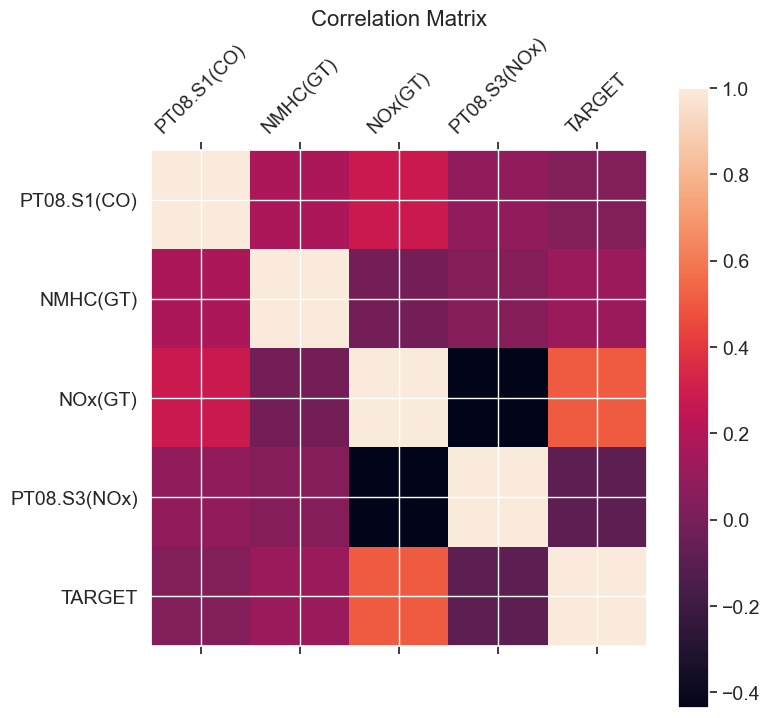

In [229]:
f = plt.figure(figsize=(8, 8))
plt.matshow(df_air_filter.corr(), fignum=f.number)
plt.xticks(range(df_air_filter.select_dtypes(['number']).shape[1]), 
           df_air_filter.select_dtypes(['number']).columns,
           fontsize=14, 
           rotation=45)
plt.yticks(range(df_air_filter.select_dtypes(['number']).shape[1]), 
           df_air_filter.select_dtypes(['number']).columns,
           fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [230]:
from sklearn.model_selection import train_test_split

X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(df_air_filter[df_air_filter.columns.difference(['TARGET'])], 
                                                    df_air[['TARGET']],
                                                    test_size=0.3)

In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
# original linear regression

regr = LinearRegression()
regr.fit(X_train_filter, y_train_filter)

LinearRegression()

In [233]:
print(regr.score(X_test_filter, y_test_filter))

0.34459458074714966


In [234]:
# creating coef dataframe to compare
df_coef = pd.DataFrame(reg_l1.coef_ , X_train.columns).T
df_coef_filter = pd.DataFrame([dict(zip(X_train_filter.columns, regr.coef_[0]))])

df_coef = pd.concat([df_coef, df_coef_filter])
df_coef = df_coef.T
df_coef.columns = ['lasso', 'linear']
df_coef


,lasso,linear
AH,-0.108048,NaN
C6H6(GT),-0.370356,NaN
NMHC(GT),0.052224,0.083679
NO2(GT),0.377303,NaN
NOx(GT),0.031421,0.194174
PT08.S1(CO),-0.012357,-0.041857
PT08.S2(NMHC),-0.018700,NaN
PT08.S3(NOx),0.007654,0.047142
PT08.S4(NO2),-0.002949,NaN
PT08.S5(O3),-0.003993,NaN


<Axes: >

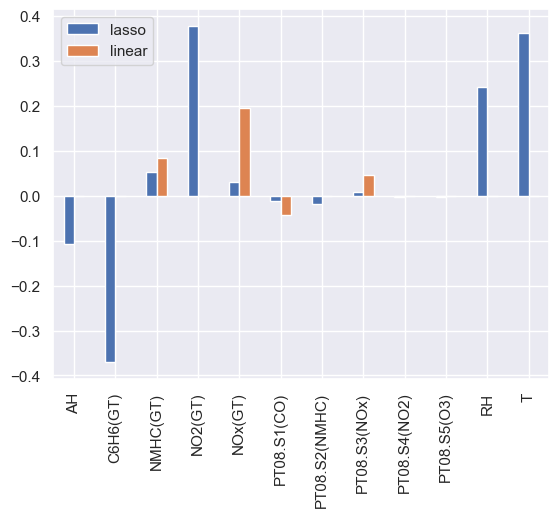

In [235]:
df_coef.plot.bar()

In [236]:
y_pred_l1 = reg_l1.predict(X_test)
y_pred_ord =regr.predict(X_test_filter)

In [237]:
from sklearn.metrics import mean_squared_error, r2_score

In [238]:
print(f"MSE on Test Set for Lasso: {mean_squared_error(y_test, y_pred_l1)}")
print(f"MSE  on Test Set for Ordinary Linear Regression: {mean_squared_error(y_test_filter, y_pred_ord)}")

MSE on Test Set for Lasso: 3186.6059376232465
MSE  on Test Set for Ordinary Linear Regression: 3941.3572121948478


In [239]:
print(f"R2 on Test Set for Lasso: {r2_score(y_test, y_pred_l1)}")
print(f"R2  on Test Set for Ordinary Linear Regression: {r2_score(y_test_filter, y_pred_ord)}")

R2 on Test Set for Lasso: 0.45922311213852673
R2  on Test Set for Ordinary Linear Regression: 0.34459458074714966


# 3. Creating an ML pipeline

Why do we need to have pipelines?

### 3.3.1 Data Leakage

`Data leakage` is when information from outside the training dataset is used to create the model and it's a big problem!


The goal of predictive modeling is to develop a model that makes accurate predictions on new data, unseen during training.

Data leakage can cause you to create overly optimistic if not completely invalid predictive models. An easy way to know you have data leakage is if you are achieving performance that seems a little too good to be true.


ways to prevent data leakage:

* Use Pipelines. Heavily use pipeline architectures that allow a sequence of data preparation steps to be performed within cross validation folds, such as the caret package in R and Pipelines in scikit-learn.
* Temporal Cutoff. Remove all data just prior to the event of interest, focusing on the time you learned about a fact or observation rather than the time the observation occurred.
* Add Noise. Add random noise to input data to try and smooth out the effects of possibly leaking variables.
* Remove Leaky Variables. Evaluate simple rule based models line OneR using variables like account numbers and IDs and the like to see if these variables are leaky, and if so, remove them. If you suspect a variable is leaky, consider removing it.
* Use a Holdout Dataset. Hold back an unseen validation dataset as a final sanity check of your model before you use it.




In [240]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [241]:
# check how StandardScaler is changing the mean and std of the data - for column 0
X_train_scaled = StandardScaler().fit_transform(X_train)

print(X_train_scaled[:, 0].mean(), X_train_scaled[:, 0].std())

print(X_train.values[:, 0].mean(), X_train.values[:, 0].std())

-2.386920168991022e-17 0.9999999999999999
-6.863297816460528 39.03547965949655


In [242]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

# try with ElasticNet + CV
pipe = Pipeline(steps=[('preprocess', StandardScaler()), 
                        ('model', ElasticNetCV(cv=10))
                       ])

In [243]:
pipe.fit(X_train, y_train)

/usr/local/google/home/amirimani/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocess', StandardScaler()),
                ('model', ElasticNetCV(cv=10))])

In [244]:
pipe.score(X_test, y_test)

0.4580759727187542

# 4- Back to Classification

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

<img src="img/lab_03_logit2.jpg"/>


Mathematically, a logistic regression model predicts P(Y=1) as a function of X. a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"). It can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.




**Binary or Binomial**

In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.

**Multinomial**

In such a kind of classification, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent “Type A” or “Type B” or “Type C”.

**Ordinal**

In such a kind of classification, dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent “poor” or “good”, “very good”, “Excellent” and each category can have the scores like 0,1,2,3.

### Decision boundaries

We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1.

For Example, We have 2 classes, let’s take them like cats and dogs(1 — dog , 0 — cats). We basically decide with a threshold value above which we classify values into Class 1 and of the value goes below the threshold then we classify it in Class 2.

<img src="img/lab_03_logit3.png"/>


As shown in the above graph we have chosen the threshold as 0.5, if the prediction function returned a value of 0.7 then we would classify this observation as Class 1(DOG). If our prediction returned a value of 0.2 then we would classify the observation as Class 2(CAT).

## Assumptions of Logistic Regression
Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity and normality.

First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed. However, some other assumptions still apply.

First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.
Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

## 4.1 Binary classification

In [245]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [246]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

The Breast Cancer dataset in sklearn contains 30 numeric features that describe the characteristics of cell nuclei in breast tissue samples. These features are used to predict whether a tumor is benign (non-cancerous) or malignant (cancerous). Here’s a list of all the features:

1. mean radius: Average of distances from the center to points on the perimeter.
2. mean texture: Standard deviation of gray-scale values.
3. mean perimeter: Perimeter of the tumor.
4. mean area: Area of the tumor.
5. mean smoothness: Local variation in radius lengths.
6. mean compactness: 
7. mean concavity: Severity of concave portions of the contour.
8. mean concave points: Number of concave portions of the contour.
9. mean symmetry: Symmetry of the tumor.
10. mean fractal dimension: “Coastline approximation” — a measure of complexity in the tumor boundary.

These 10 features are computed for the mean, standard error, and worst (maximum value). This results in 30 features

In [247]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X.shape, y.shape

((569, 30), (569,))

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=42)
X_train.shape

(426, 30)

In [249]:
model = LogisticRegression()

pipe = Pipeline(steps=[('clf', model)
                       ])

In [250]:
pipe.fit(X_train[:, :2], y_train)

Pipeline(steps=[('clf', LogisticRegression())])

In [251]:
pipe.score(X_test[:, :2], y_test)

0.8881118881118881

## 4.2 Multiclass Classification

In [252]:
from sklearn.datasets import load_iris

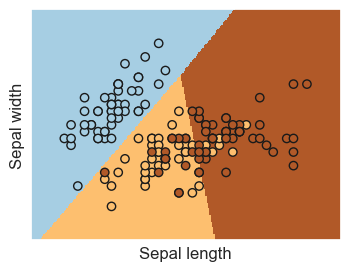

In [253]:
# import some data to play with
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Answers

In [ ]:
# regression using all the features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Create linear regression object
regr_all = linear_model.LinearRegression()

# Train the model using the training sets
regr_all.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_all.predict(X_test)

# The coefficients
print('Coefficients: \n', regr_all.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))